# CSC 421 - Constraint Satisfaction Problems

### Instructor: George Tzanetakis 



Problems can be solved by searching the state space. The state space is a representation of a problem where the nodes are states and the edges between them are actions. Domain-specific heuristics can be used to estimate the cost of reaching the goal from a given state to make searching for solutions more efficient. The state representation is treated as a black box. 

**Constraint Satisfaction Problems** are a specific type of problem in which the state representation is **factored**. The state in such problems can be represented as a set of **variables** each of which has a **value** from a particular **domain**. A problem is solved when each variable has a value that satisfies 
all the constraints that involve that variable. 


Defining a CSP problem: 

* X is a set of variables {X1, X2, .. XN} 
* D is a set of domains {D1, ...., Dn} (one for each variable) 
* C is a set of constraints that specify allowable combinations of values 

Any contraint can be represented as an explicit set of tuples of values that satisfy the constraint or as a membership function (typically syntactic sugar). 

For example X1 and X2 with domain {1,2,3}. 

X1>X2 can be written as {(3,1),(3,2),(2,1)}




A **consistent** assignment is an assignment of values to variables that does not violate any constraints. 
A **complete** assignment is an assignment of values to all variables. A **complete** and **consistent** assignment is called a **solution** to the CSP problem. A **partial** assignment is one that leaves some variables unassigned, and a **partial solution** is a partial assignment that is consistent. 

Solving a **CSP** problem is an NP-complete problem in general. 

## Associated Readings 

The section numbers are based on the 4th edition of the textbook. They also should work for the 3rd edition.

CHAPTER 7 LOGICAL AGENTS

Basic: Sections 7.1, 7.2, 7.3, 7.4, and Summary
Expected: 7.5
Advanced: All the chapter including bibliographical and historical notes

## Classic example - map coloring 


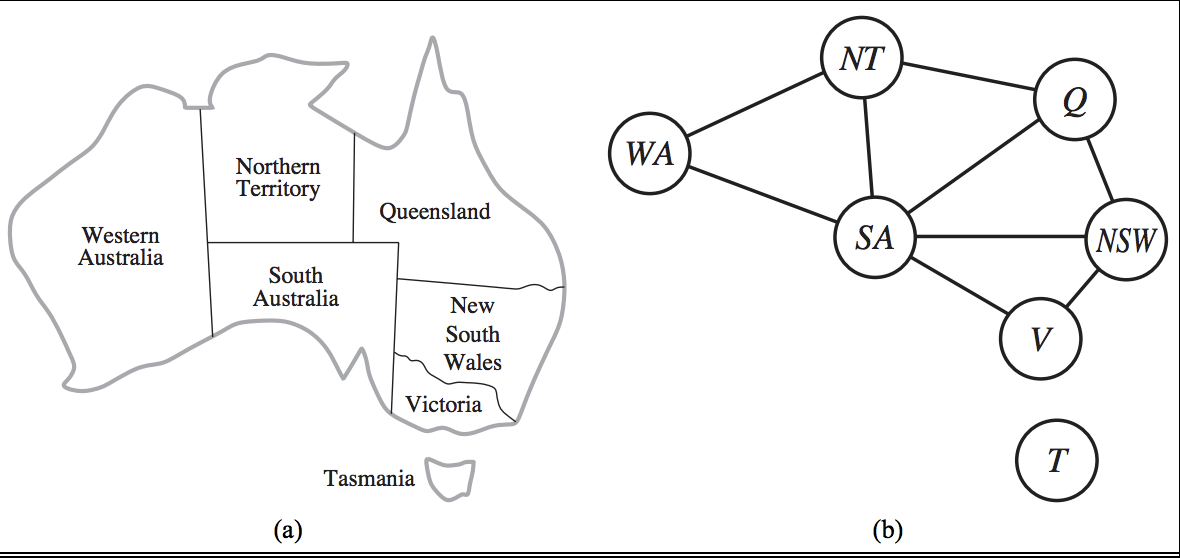

SA != WA 

Full enumeration 

{(SA,WA): (red, green), (red, blue), (green, red), (green,blue), (blue, red), (blue, green)}

Many possible solutions. For example: 

{WA=red, NT=green, Q=red, NSW=green, V=red, SA=blue, T=red} 

In CSP we can leverage information during search: 

* Partial assignment violates a constraint we can immediately discard further refinements of the partial assignment 
* We can see which variable violate a constraint and focus attention on the variables that matter 


### Historical Sidenote 1 

The 4-color conjecture states that any planar graph can be colored with four or fewer colors. 
A planar graph is a graph that can be drawn on a place without the edges crossing each other. 


Probably first made by Francis Guthrie, student of De Morgan in 1852. Despite efforts first proof in 1977 by Appel and Haken (with computer aid). This is a historic proof because it was the first widely accepted proof that was made by a computer system. 


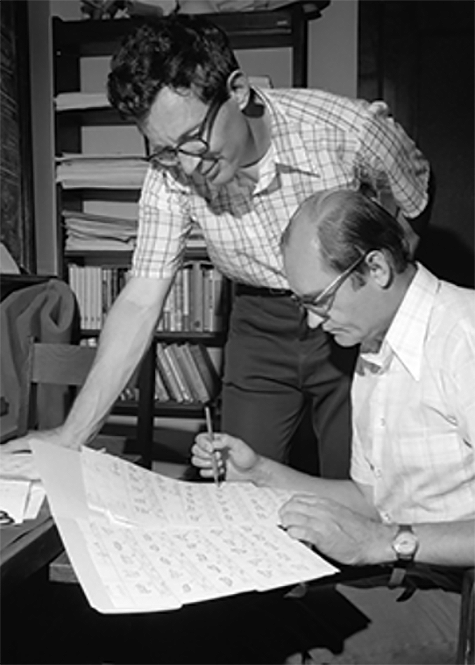

### Historical Sidenote 2 

CSP algorithms were used in SketchPad by Ivan Sutherland in 1963. Forerunner of pointer/display interaction, CAD, etc. 


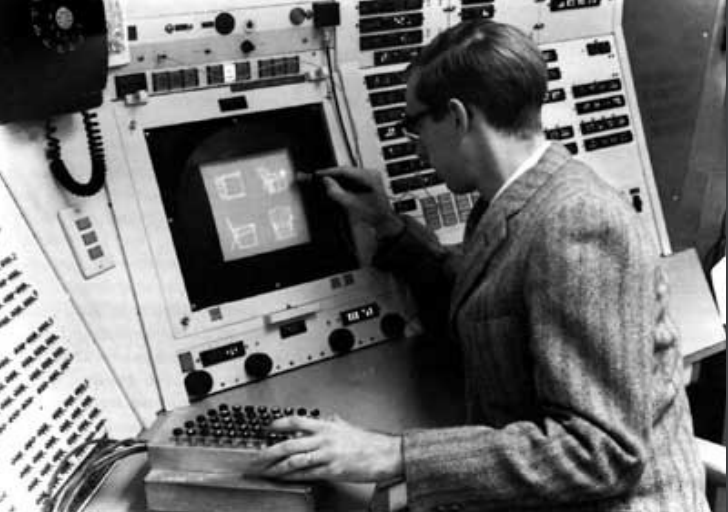

### Generating rhythmic exercises at different levels of difficulty 2008 

Joint work with Graham Percival, Torsten Anders, and George Tzanetakis


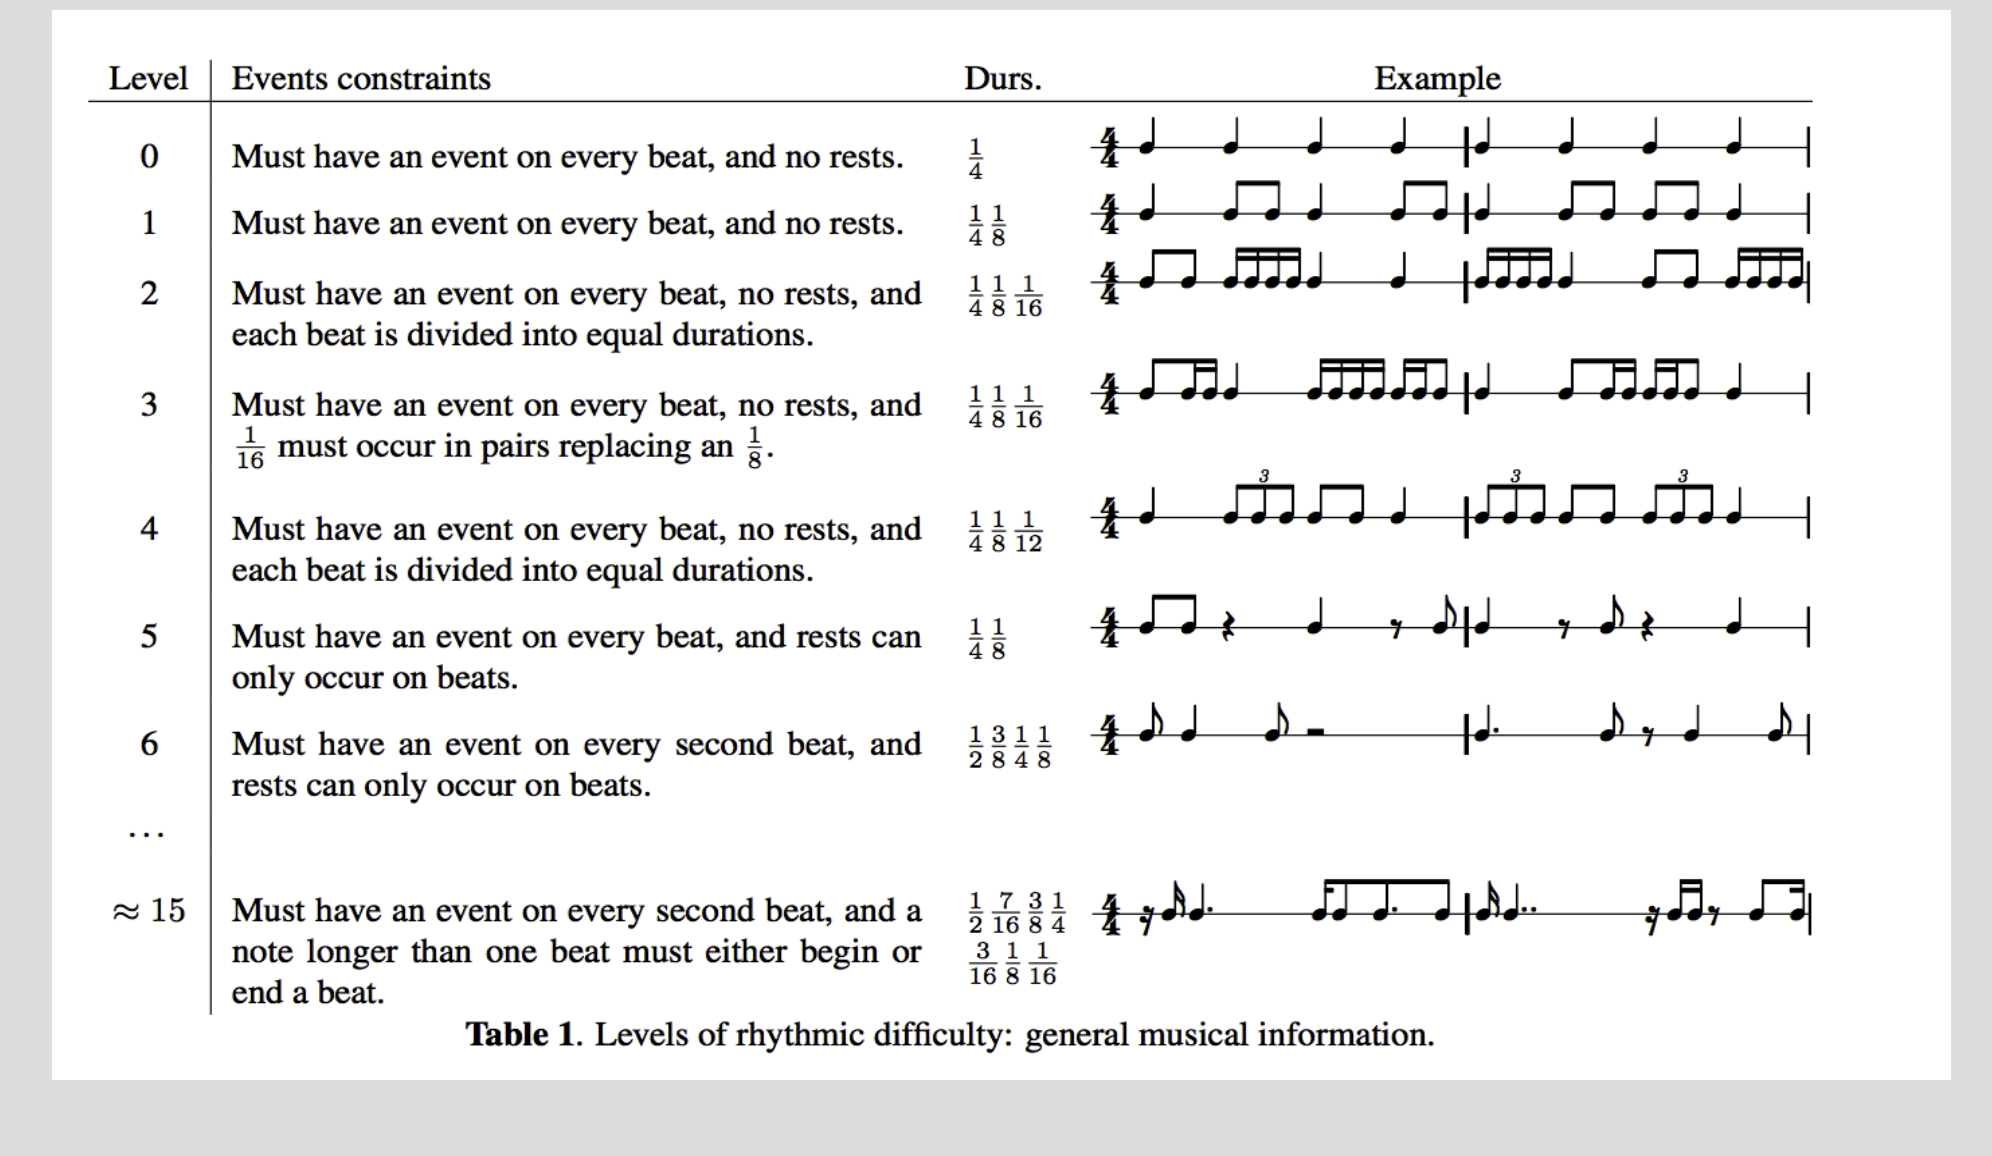

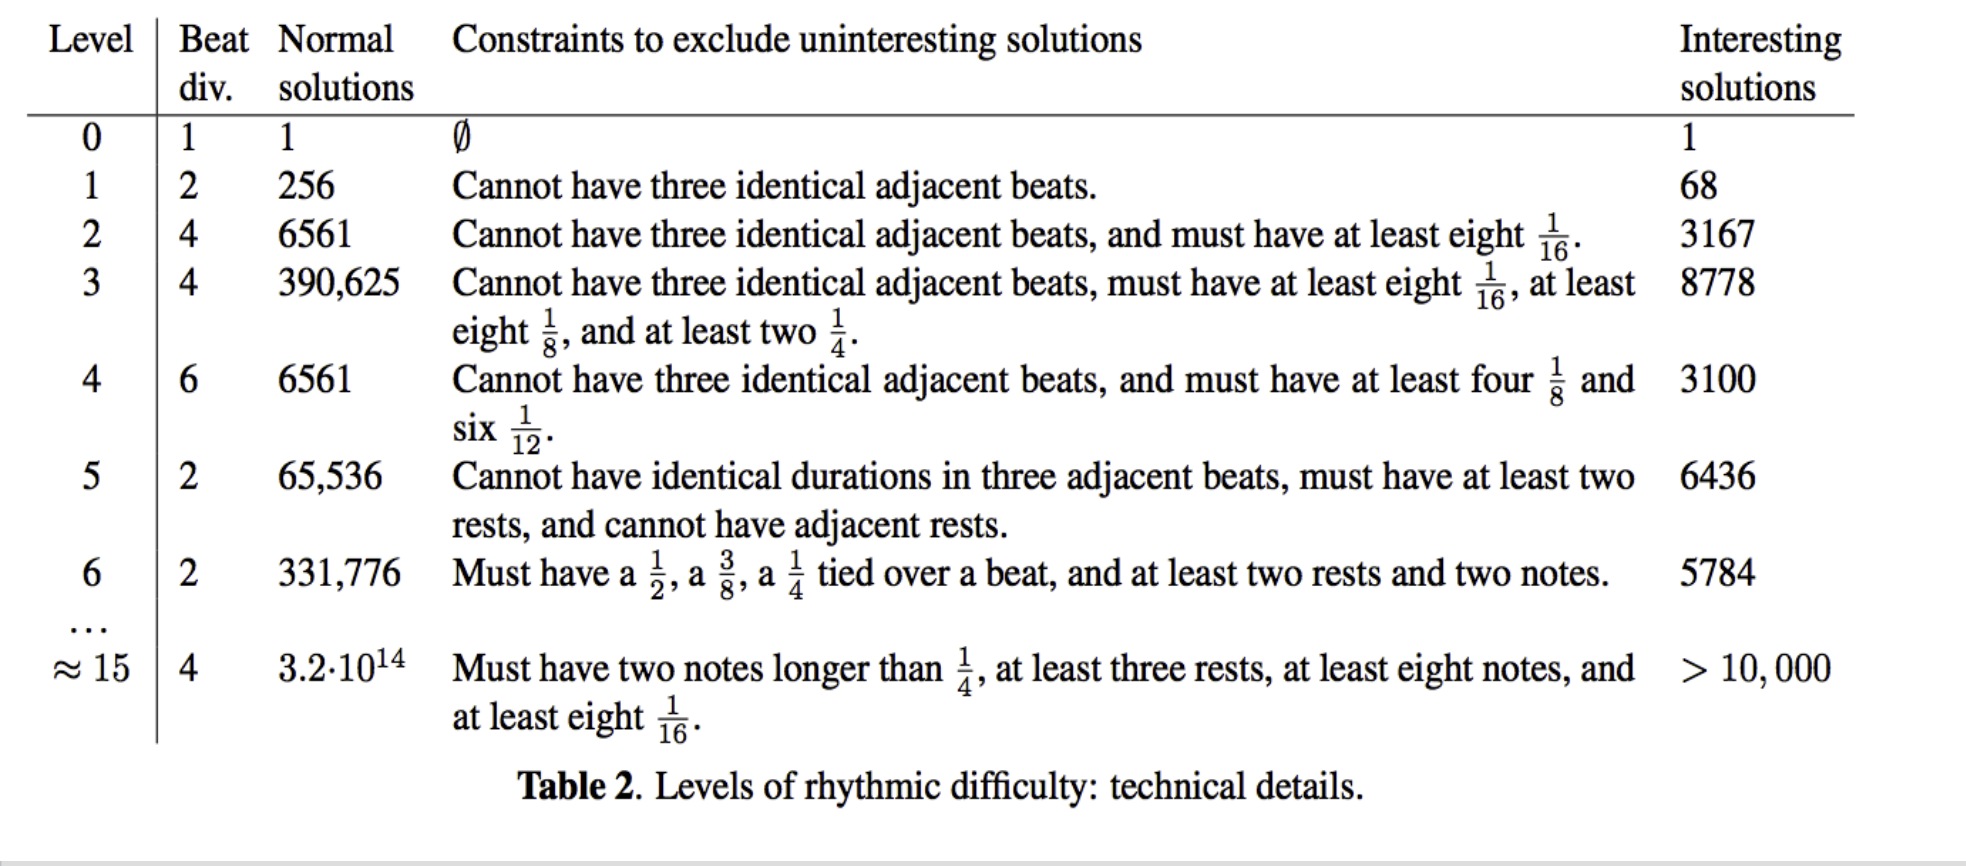

In [2]:
# Recursive backtracking - start with an initial assignment (usually empty) and then select a variable and 
# assign it a value. If the current assignment is consistent with the constraints call recursively 

def recursive_backtracking(assignment, csp):
    if isComplete(assignment):
        return assignment
    var = select_unassigned_variable(csp["VARIABLES"], assignment)
    for value in csp["DOMAINS"]:
        assignment[var] = value
        if is_consistent(assignment, csp["CONSTRAINTS"]):
            result = recursive_backtracking(assignment, csp)
            if result != "FAILURE":
                return result
        assignment[var] = None
    return "FAILURE"


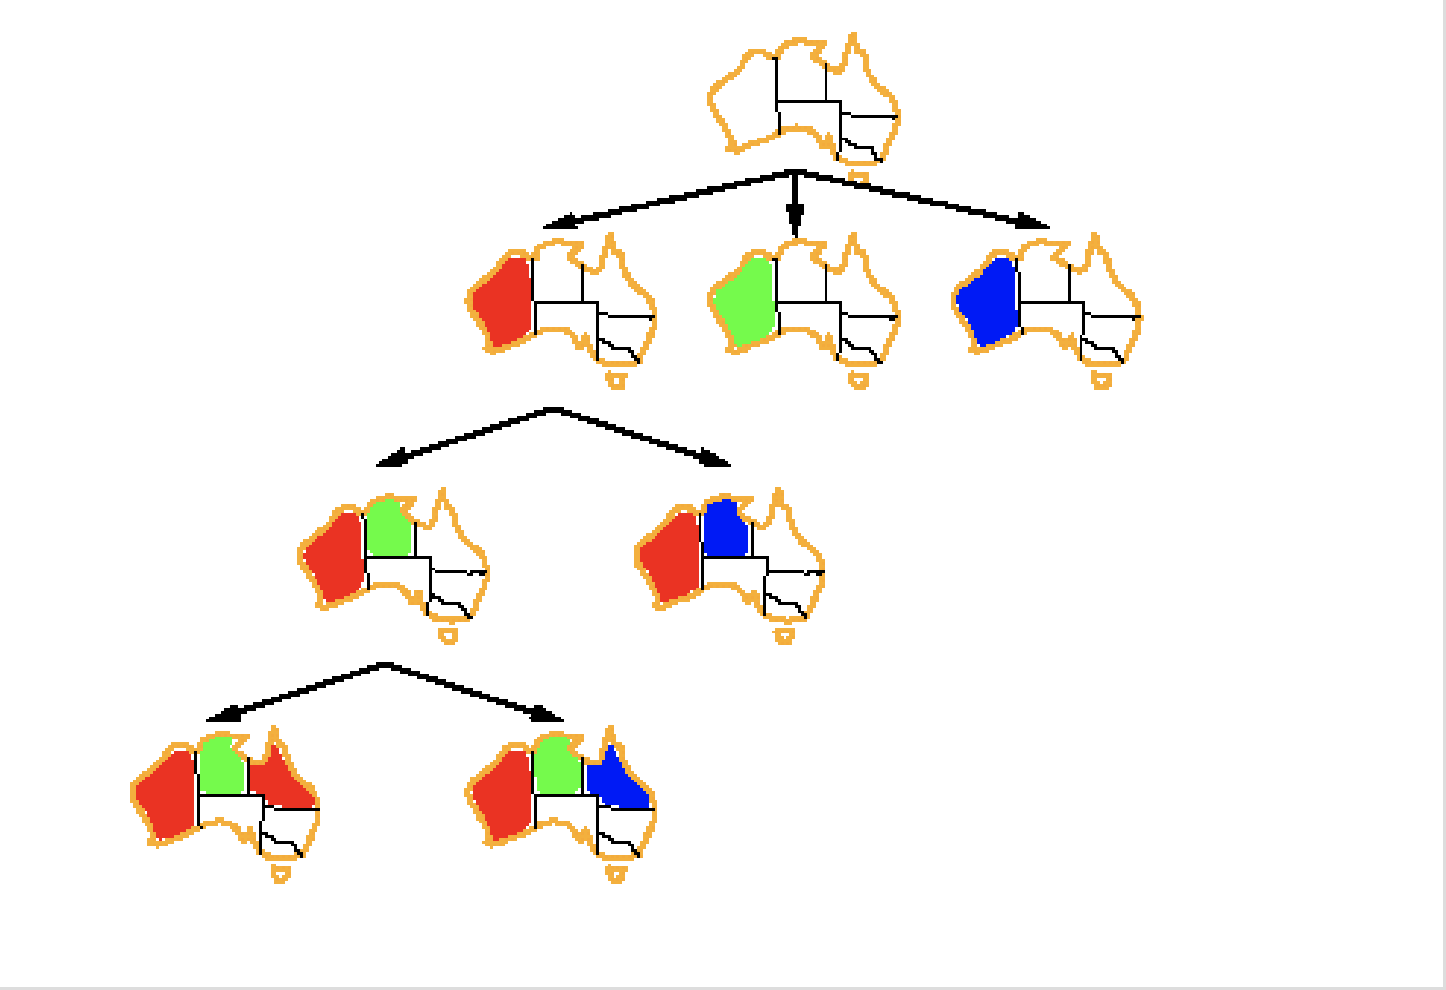

### Heuristics to use during backtracking search 

1. Minimum remaining values:  i.e choose the variable with the fewest legal values 
2. Degree heuristic: Tie-breaker among MRV variables - choose the one with the most constraints with remaining variables 
3. Least constraining variable: rules out the fewest choices for the neighboring variables in the constraint graph


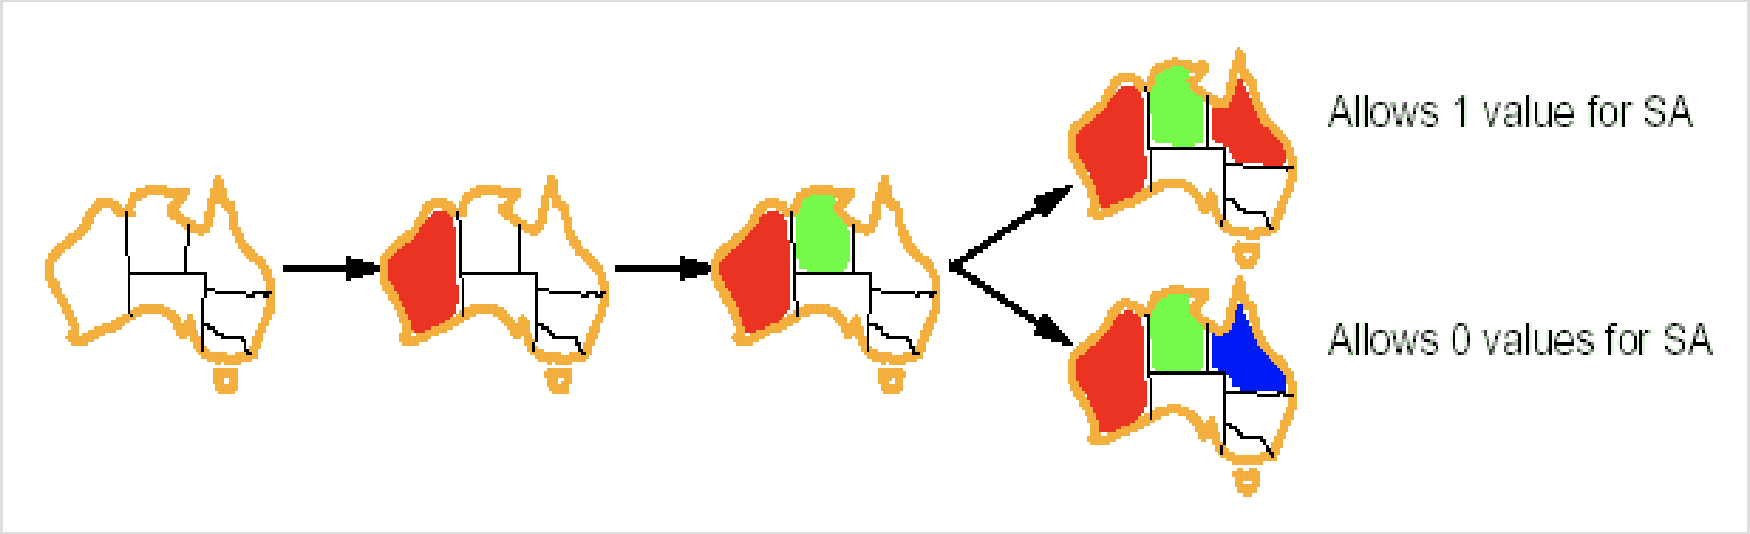

4. Forward Checking: keep track of remaining legal values for unassigned variables 

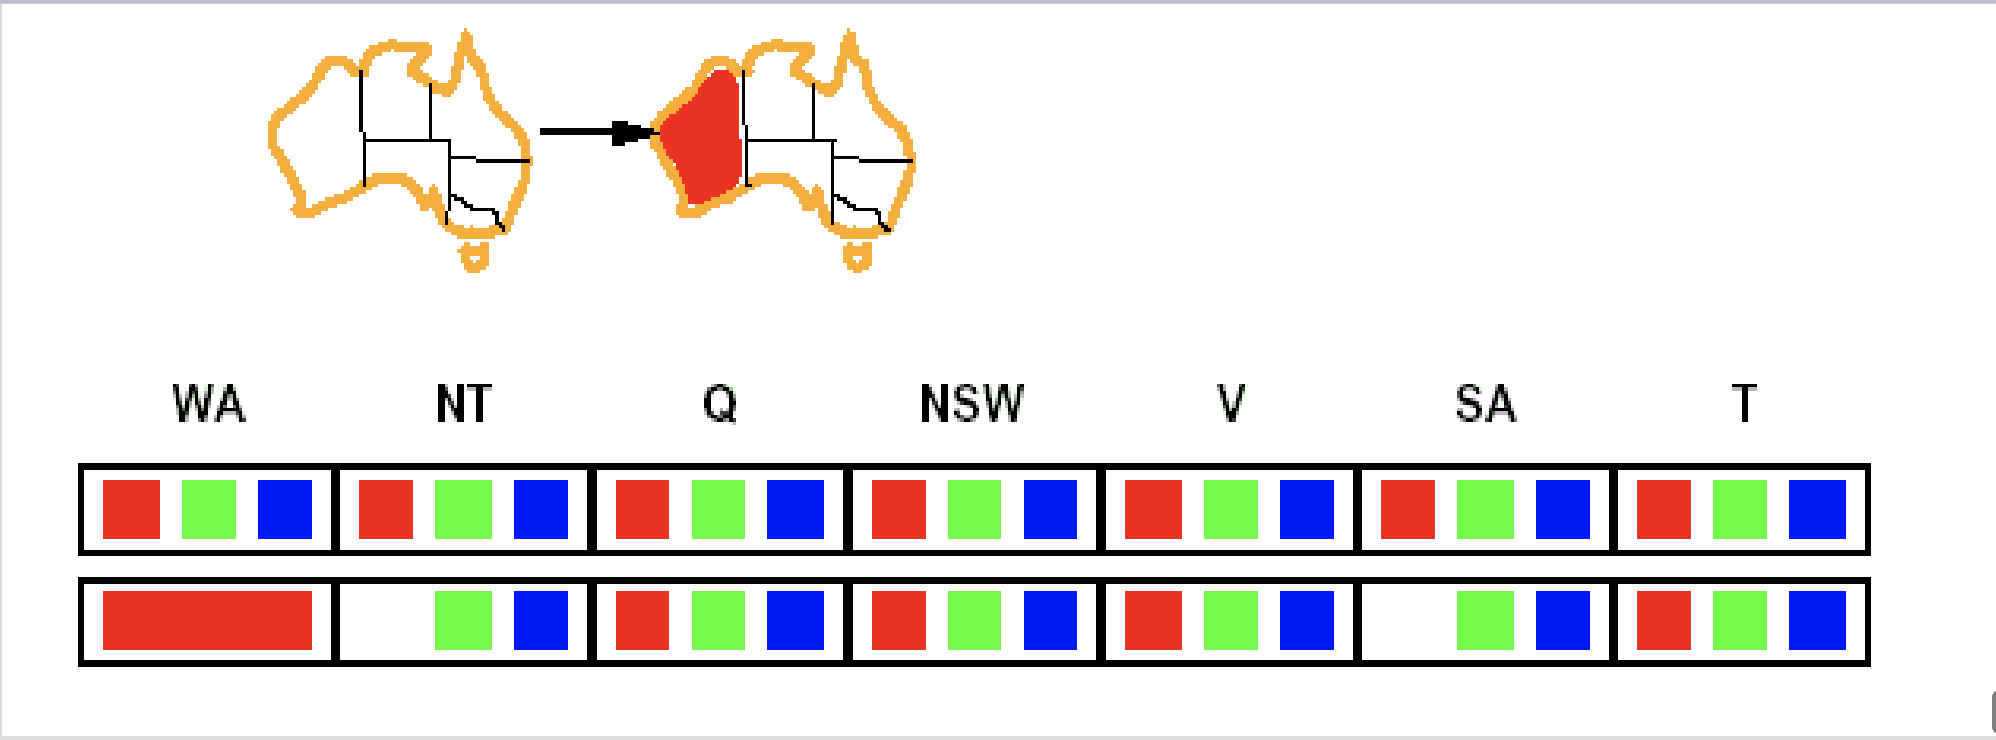

 

## Summary 


1. CSPs are a special kind of problem 
2. States defined by values of a fixed set of variables
3. Goal test defined by constraints of variable values
4. Back-tracking = depth-first search with one variable assigned per node
5. Variable ordering and value selection heuristics can help significantly
6. Forward checking prevents assignments that guarantee later failure 
7. Specific-constraint type and structure (for example trees) can lead to more efficient solvers 